In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
import random

# Get files content
import os

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# sklearn tools
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

# Utilisation du module nb_black pour formater le code
%load_ext nb_black

<IPython.core.display.Javascript object>

Use parquet version of the dataset thanks to this kernel https://www.kaggle.com/code/camilomx/parquet-format-quickstart

Several ideas are picked up from this kernel https://www.kaggle.com/code/bastiendelaval/analyse-oc.

In [15]:
# Import dataset
path = "./train_low_mem.parquet"
df = pd.read_parquet(path)

<IPython.core.display.Javascript object>

In [16]:
# Display first rows
df.head(5)

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624


<IPython.core.display.Javascript object>

There are 300 features named "f_i" for i in (0, 300). 

There is the target named "target".

Row_id is linked to investment_id and there is a column time_id

In [18]:
# Dimension
df.shape

(3141410, 304)

<IPython.core.display.Javascript object>

In [17]:
# Info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141410 entries, 0 to 3141409
Columns: 304 entries, row_id to f_299
dtypes: float32(301), object(1), uint16(2)
memory usage: 3.6+ GB


<IPython.core.display.Javascript object>

304 columns and more than 3M of rows.

Column row_id is dtype object.

In [22]:
print("Columns of dtype uint16 : ")
for col in df.select_dtypes("uint16"):
    print(col)

Columns of dtype uint16 : 
time_id
investment_id


<IPython.core.display.Javascript object>

In [19]:
# Data summary
df.describe()

,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
count,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,...,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06,3.141410e+06
mean,6.654862e+02,1.885265e+03,-2.109159e-02,1.637057e-03,-1.257678e-02,8.514749e-03,-2.003703e-02,-5.416438e-03,-3.034008e-03,1.934330e-03,...,1.256709e-02,9.002053e-04,-6.509154e-03,2.851608e-03,-4.730820e-03,-2.773806e-02,-1.517383e-03,-7.057928e-03,-4.216896e-03,-4.319488e-03
std,3.560434e+02,1.083616e+03,9.176629e-01,1.079721e+00,1.030980e+00,1.030281e+00,9.602916e-01,9.895188e-01,1.104578e+00,1.067755e+00,...,1.084496e+00,1.114387e+00,1.070176e+00,1.101158e+00,1.144516e+00,9.592550e-01,1.140459e+00,1.108097e+00,1.051252e+00,1.008220e+00
min,0.000000e+00,0.000000e+00,-9.419646e+00,-1.765789e+01,-6.579473e+00,-8.644268e+00,-1.800427e+01,-4.000015e+00,-8.833704e+00,-6.384251e+00,...,-9.271487e+00,-6.359966e+00,-8.183732e+00,-2.399478e+01,-1.497270e+01,-9.348986e+00,-7.366648e+00,-7.579406e+00,-6.707284e+00,-1.028264e+01
25%,3.530000e+02,9.520000e+02,-5.004572e-01,-4.071441e-01,-6.813878e-01,-6.530838e-01,-4.496046e-01,-3.532303e-01,-7.070855e-01,-7.911198e-01,...,-6.037326e-01,-8.355157e-01,-6.981400e-01,-1.377131e-01,-9.397985e-01,-5.147926e-01,-9.573807e-01,-7.239380e-01,-8.165390e-01,-5.080143e-01
50%,7.040000e+02,1.882000e+03,-9.717009e-02,2.431158e-01,-4.867587e-02,4.350941e-02,-2.639937e-01,-1.908876e-01,-2.144796e-02,1.437945e-02,...,6.086323e-02,-2.023181e-01,-1.910102e-01,2.164071e-01,2.087202e-01,-2.907780e-01,6.955573e-03,-1.650222e-01,2.300689e-02,-2.824031e-01
75%,9.750000e+02,2.830000e+03,3.572908e-01,6.649507e-01,6.086557e-01,6.587324e-01,7.763371e-02,2.784694e-02,6.835684e-01,8.008306e-01,...,6.882384e-01,9.035954e-01,4.841421e-01,5.088849e-01,8.616266e-01,1.275946e-01,9.503851e-01,6.098197e-01,7.984827e-01,1.411301e-01
max,1.219000e+03,3.773000e+03,1.203861e+01,7.845261e+00,8.707207e+00,8.009340e+00,4.706333e+01,7.662866e+01,7.646200e+00,6.778142e+00,...,9.298274e+00,9.725060e+00,2.231185e+01,6.587691e+00,6.978151e+00,6.140367e+01,7.679950e+00,1.241804e+01,7.003982e+00,4.337021e+01


<IPython.core.display.Javascript object>

Features seem to have low values (< 100) and can get be negative, even for the target.

As the means are very close to zero, we can consider that features f had already been standardized.

In [20]:
def perc_missing(df):

    """"
    Function to get percentage of missing data
    Arguments :
    - df : dataframe to get the percentage
    Return :
    - column with missing value in percent sort in descending order
    """

    return (df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

<IPython.core.display.Javascript object>

In [21]:
perc_missing(df)

row_id    0.0
f_196     0.0
f_203     0.0
f_202     0.0
f_201     0.0
         ... 
f_96      0.0
f_95      0.0
f_94      0.0
f_93      0.0
f_299     0.0
Length: 304, dtype: float64

<IPython.core.display.Javascript object>

There is no missing value.

Many kernels use this function to reduce the memory usage of the dataset (to avoid Memory-over error). I didn't find the original kernel that introduce this.

Be careful it takes a long time.

In [89]:
def reduce_mem_usage(df):

    start_mem = df.memory_usage().sum() / 1024 ** 2
    print("Memory usage of dataframe is {:.2f} MB".format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024 ** 2

    print("Memory usage after optimization is: {:.2f} MB".format(end_mem))
    print("Decreased by {:.1f}%".format(100 * (start_mem - end_mem) / start_mem))

    return df


df = reduce_mem_usage(df)

Memory usage of dataframe is 3642.99 MB
Memory usage after optimization is: 1915.96 MB
Decreased by 47.4%


<IPython.core.display.Javascript object>

### Investment

In [90]:
print("Number of unique investiment_id : ", df["investment_id"].nunique())

Number of unique investiment_id :  2788


<IPython.core.display.Javascript object>

In [91]:
df["investment_id"].value_counts()

2752.0    3576
3052.0    3528
3304.0    3516
2356.0    3514
2712.0    3510
          ... 
85.0         8
905.0        8
2558.0       8
3662.0       7
1415.0       2
Name: investment_id, Length: 2788, dtype: int64

<IPython.core.display.Javascript object>

It seems that several investments have low frequency.

In [92]:
df.loc[df["investment_id"] == 905]

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
3114764,1212_905,1212.0,905.0,0.000000,-0.252197,1.872070,0.0,4.925781,0.670410,-0.845703,...,-0.311768,-0.770996,5.261719,0.484131,1.284180,5.691406,0.902832,-0.551758,0.000000,-0.747559
3118203,1213_905,1213.0,905.0,0.000000,0.493896,1.320312,0.0,3.734375,0.778320,1.180664,...,-0.295898,-0.635254,4.656250,1.114258,0.785645,5.433594,0.859375,-0.394043,0.000000,-0.744141
3121643,1214_905,1214.0,905.0,2.146484,0.550293,0.807129,0.0,3.269531,0.757812,1.683594,...,-0.274170,-0.718262,2.626953,0.920410,-0.713379,3.414062,1.051758,-0.598145,0.000000,5.406250
3125082,1215_905,1215.0,905.0,-1.416016,0.559082,0.318848,0.0,3.273438,0.761230,1.991211,...,-0.979492,-0.694824,-0.071411,0.769043,0.966797,2.679688,1.137695,-0.651855,0.000000,5.050781
3128514,1216_905,1216.0,905.0,1.966797,0.782715,-0.057007,0.0,3.912109,0.814941,2.457031,...,-0.241333,-0.730957,0.745605,-1.161133,0.857910,2.376953,0.944336,-0.917480,2.228516,5.242188
3131924,1217_905,1217.0,905.0,1.357422,0.672852,-0.451416,0.0,3.066406,0.751465,1.683594,...,-0.221924,-1.651367,0.945801,0.405518,-1.481445,1.855469,0.611328,-0.768555,2.031250,5.097656
3135350,1218_905,1218.0,905.0,-1.402344,0.289551,-0.486572,0.0,3.390625,0.796875,-1.569336,...,0.102722,1.220703,0.464111,0.482178,-1.033203,2.160156,1.131836,1.375977,1.838867,5.093750
3138783,1219_905,1219.0,905.0,-3.046875,0.482910,-0.330078,0.0,3.816406,0.826172,-1.804688,...,-0.818848,0.811523,-0.613281,-1.142578,0.421631,2.611328,1.363281,4.093750,1.701172,4.792969


<IPython.core.display.Javascript object>

In [49]:
# Get list of number investment_id appearing less than 5, 10.. until 100 times
list_invest = []

for i in range(5, 101, 5):
    list_invest.append((df["investment_id"].value_counts() < i).sum())

<IPython.core.display.Javascript object>

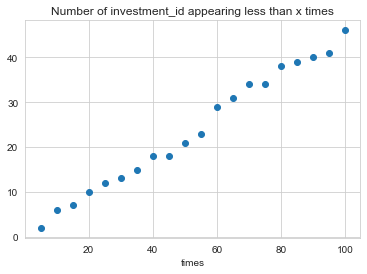

<IPython.core.display.Javascript object>

In [59]:
# Plot the result
plt.scatter(range(5, 101, 5), list_invest)
plt.title("Number of investment_id appearing less than x times")
plt.xlabel("times")
plt.show()

### time_id

In [93]:
print("Number of unique time_id : ", df["time_id"].nunique())

Number of unique time_id :  1211


<IPython.core.display.Javascript object>

In [94]:
df["time_id"].value_counts()

1214.0    3445
1209.0    3444
1211.0    3440
1207.0    3440
1208.0    3438
          ... 
415.0      659
362.0      651
374.0      600
398.0      539
492.0      512
Name: time_id, Length: 1211, dtype: int64

<IPython.core.display.Javascript object>

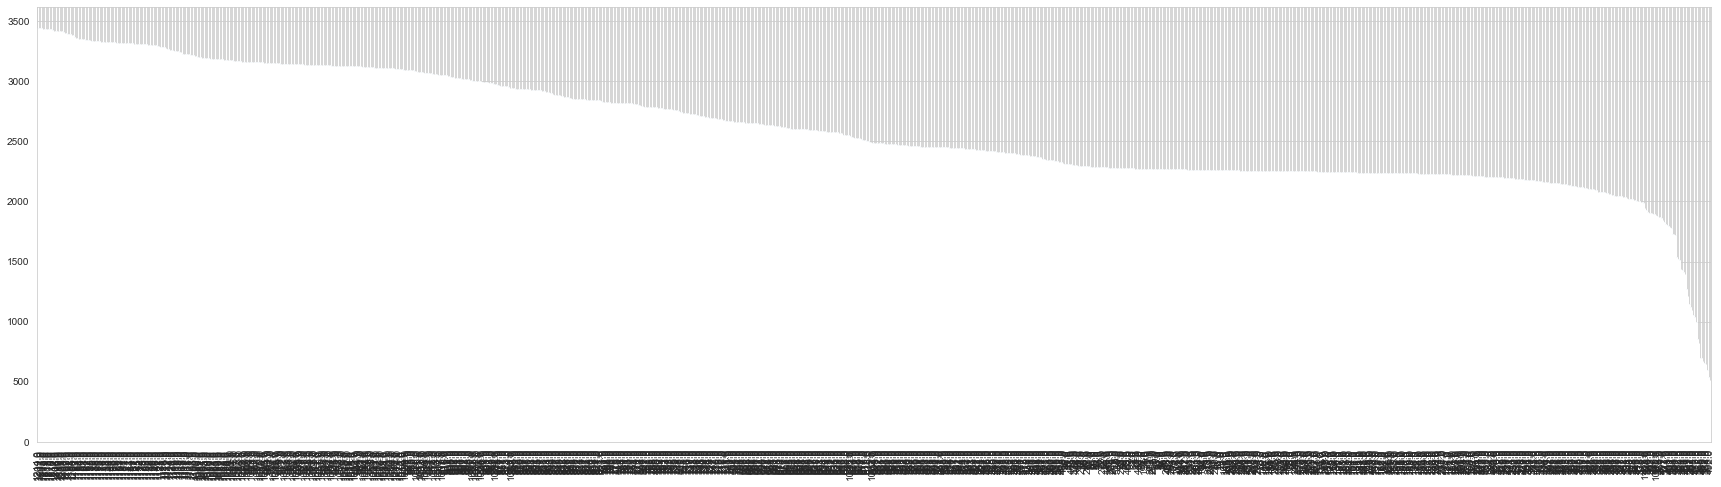

<IPython.core.display.Javascript object>

In [95]:
plt.figure(figsize=(30, 8))
df["time_id"].value_counts().plot(kind="bar")
plt.show()

In [96]:
print(
    "Percent of time_id value_counts >= 2000 : {}%".format(
        round(
            (df["time_id"].value_counts() >= 2000).sum()
            / len(df["time_id"].value_counts())
            * 100,
            1,
        )
    )
)

Percent of time_id value_counts >= 2000 : 95.8%


<IPython.core.display.Javascript object>

### Features
A histogram of all features is available at this kernel https://www.kaggle.com/code/mk1001/eda-f-0-299-histogram/notebook.

Let's see randomly six of them :

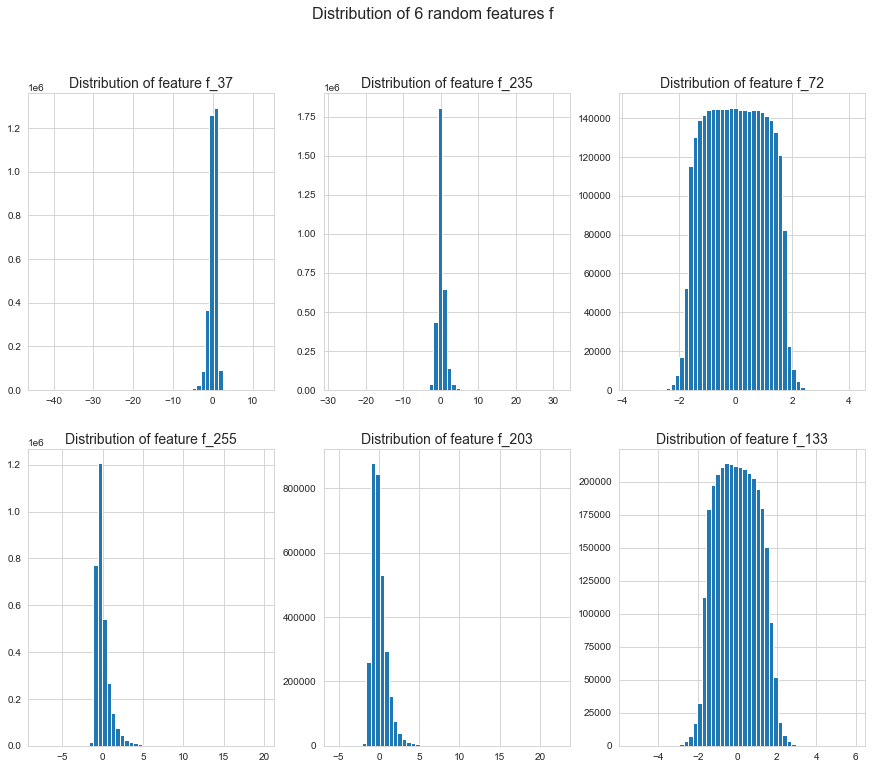

<IPython.core.display.Javascript object>

In [120]:
np.random.seed(1)

# Initiate counter
i = 1

# Initiate plot
plt.figure(figsize=(15, 12))
plt.suptitle("Distribution of 6 random features f", size=16)

# Plot randomly 6 histograms of features f_
for f in np.random.choice(range(0, 300), 6):
    plt.subplot(2, 3, i)
    df["f_{}".format(f)].hist(bins=50)
    plt.title("Distribution of feature f_{}".format(f), size=14)
    i += 1

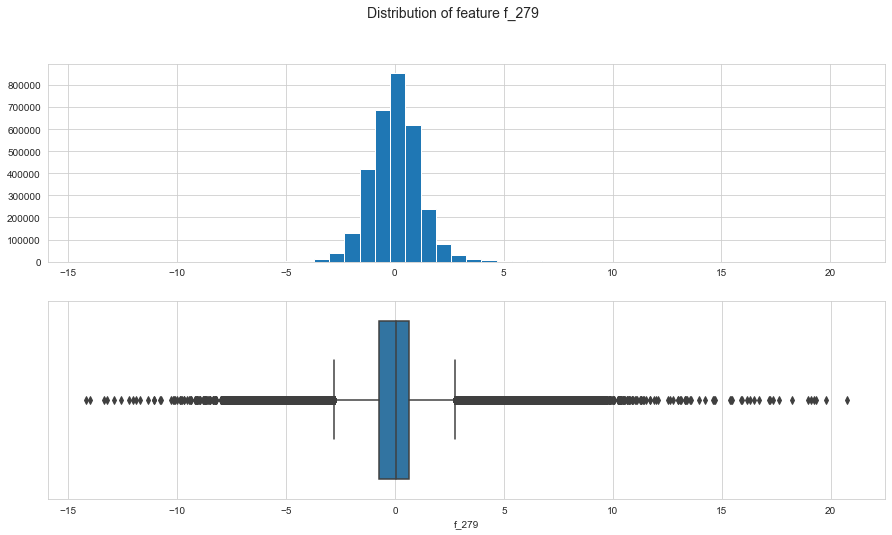

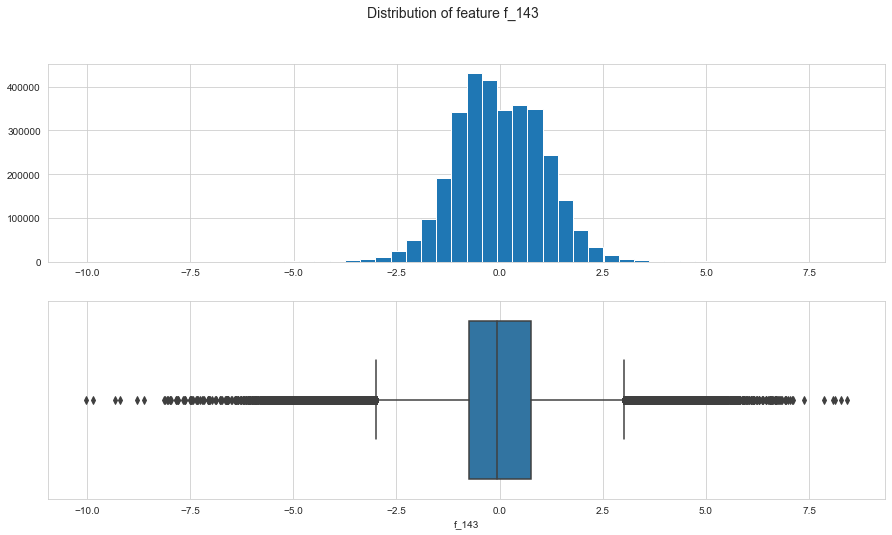

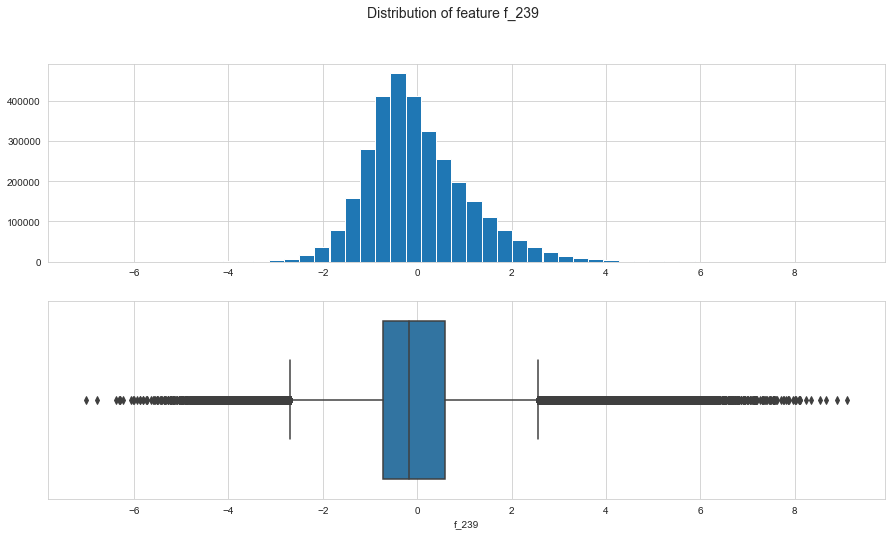

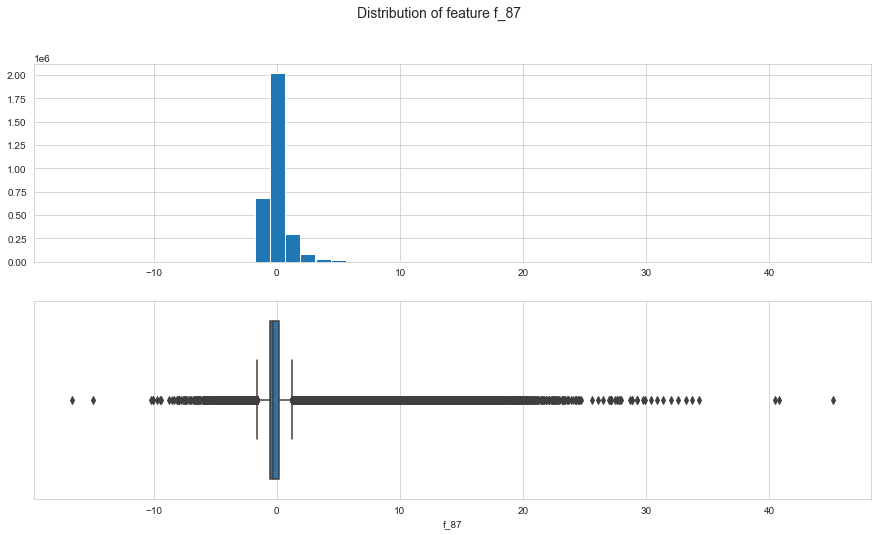

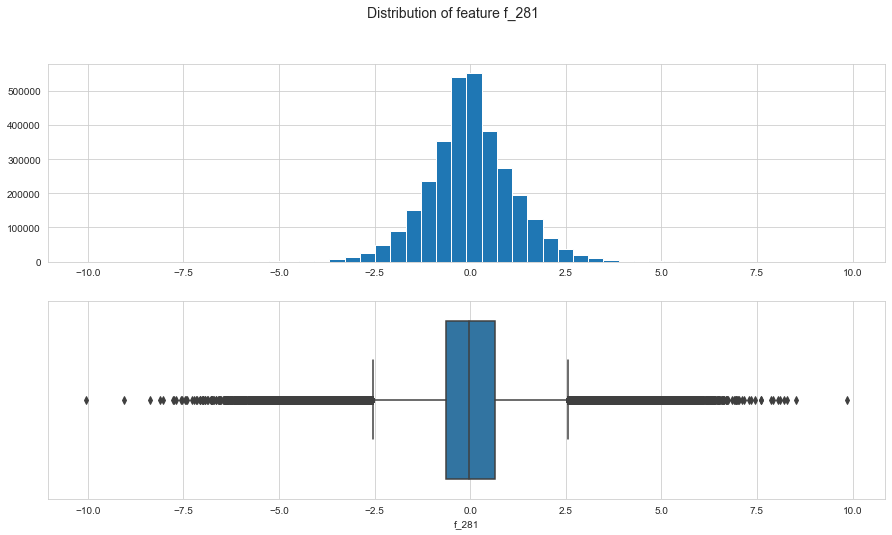

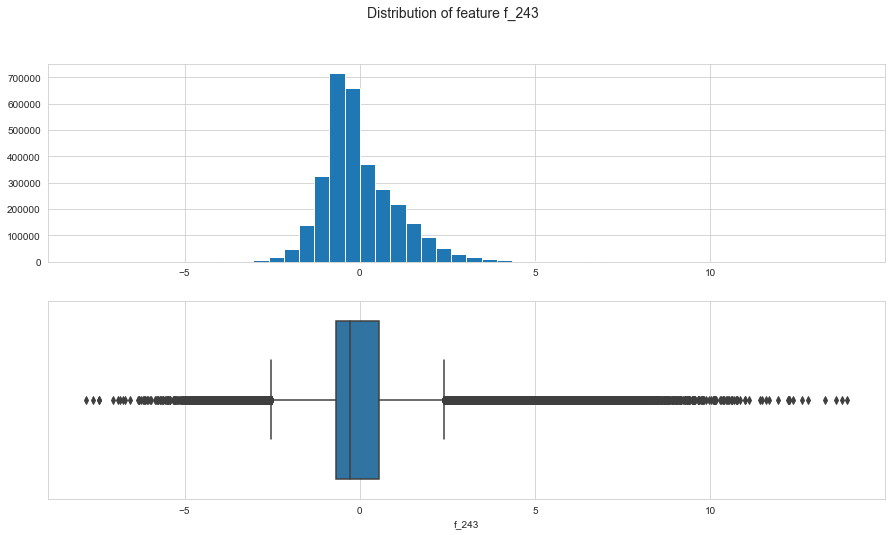

<IPython.core.display.Javascript object>

In [146]:
# Initiate counter
i = 1

# Initiate plot
# plt.figure(figsize=(15, 12))
# plt.suptitle("Distribution of 6 random features f", size=16)

# Plot randomly 6 histograms of features f_
for f in np.random.choice(range(0, 300), 6):
    # df["f_{}".format(f)].hist(bins=50)
    # Initiate plot
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    plt.suptitle("Distribution of feature f_{}".format(f), size=14)
    # Target histogram
    df["f_{}".format(f)].hist(bins=50, ax=axes[0])

    # Target Boxplot
    sns.boxplot(x="f_{}".format(f), data=df, ax=axes[1])
    plt.show()

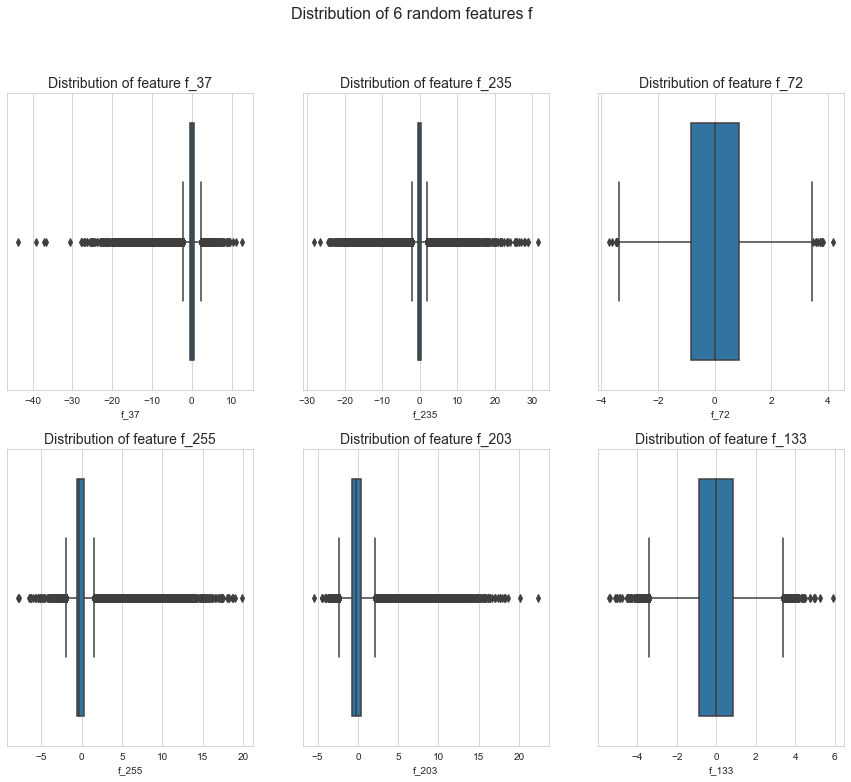

<IPython.core.display.Javascript object>

In [122]:
np.random.seed(1)

# Initiate counter
i = 1

# Initiate plot
plt.figure(figsize=(15, 12))
plt.suptitle("Distribution of 6 random features f", size=16)

# Plot randomly 6 histograms of features f_
for f in np.random.choice(range(0, 300), 6):
    plt.subplot(2, 3, i)
    sns.boxplot(x="f_{}".format(f), data=df)
    plt.title("Distribution of feature f_{}".format(f), size=14)
    i += 1

Some features are centered in zero.

Some of them get outliers as the distribution is not centered. So maybe, in the future we could consider to normalize data with a Robust Scaler in order to limit the influence of outliers.

In [178]:
# List of features columns
features = [f"f_{i}" for i in range(0, 300)]

<IPython.core.display.Javascript object>

### Target
Let's see the target distribution.

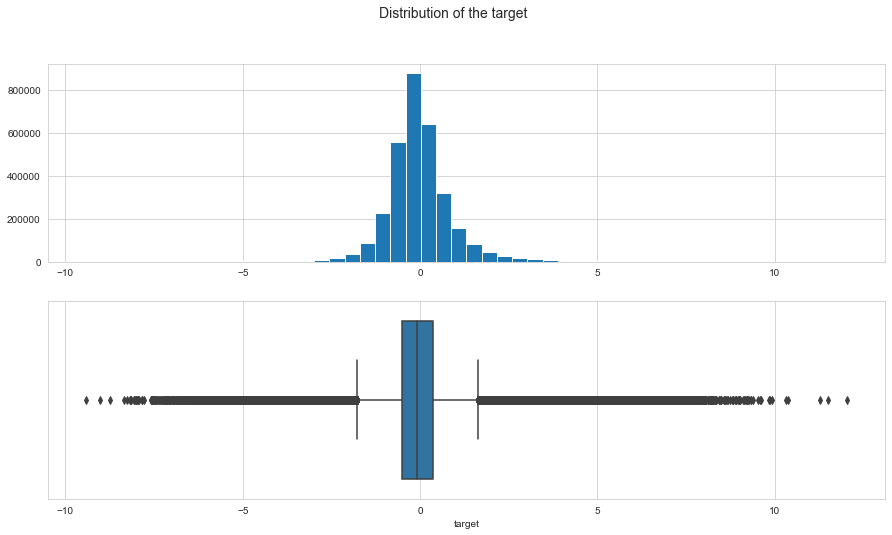

<IPython.core.display.Javascript object>

In [128]:
# Initiate plot
f, axes = plt.subplots(2, 1, figsize=(15, 8))

plt.suptitle("Distribution of the target", size=14)

# Target histogram
df["target"].hist(bins=50, ax=axes[0])

# Target Boxplot
sns.boxplot(x="target", data=df, ax=axes[1])
plt.show()

The distribution seems to be gaussian.

Let's plot the target distribution for some investment_id :

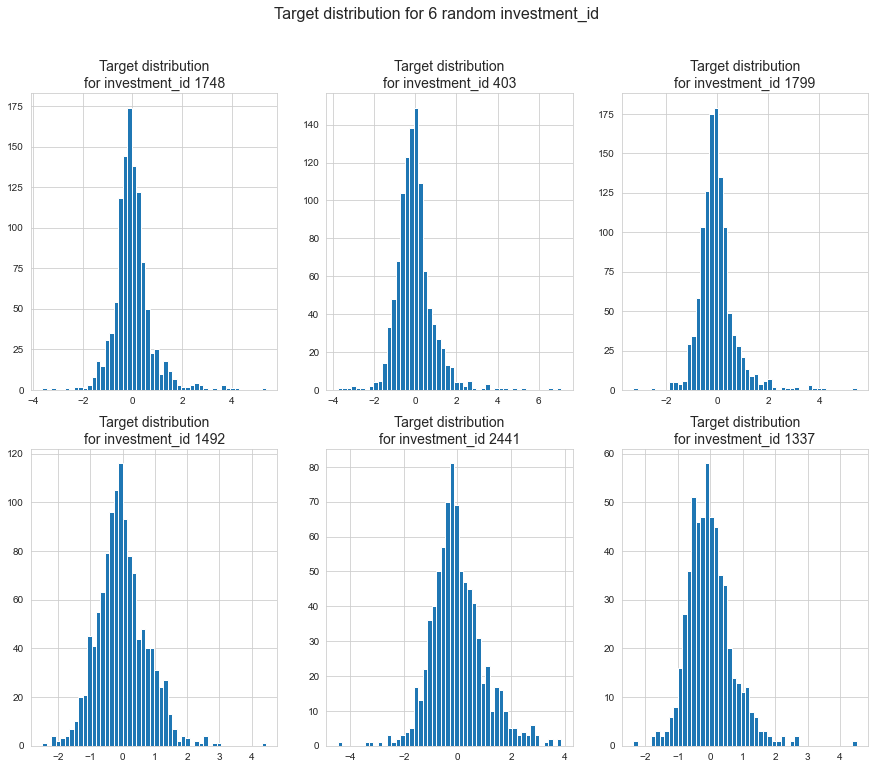

<IPython.core.display.Javascript object>

In [82]:
np.random.seed(1)

# Initiate counter
i = 1

# Initiate plot
plt.figure(figsize=(15, 12))
plt.suptitle("Target distribution for 6 random investment_id", size=16)

# Plot randomly 6 histograms of the target
for j in np.random.choice(df["investment_id"].unique(), 6):
    plt.subplot(2, 3, i)
    df[df["investment_id"] == j]["target"].hist(bins=50)
    plt.title("Target distribution\nfor investment_id {}".format(j), size=14)
    i += 1

For individual investment_id, target distribution seems to be less gaussian. Some values are high for values being at the "tail of the distribution" (e.g. investment_id 2441, 1337).

### Bidimensional analysis
Let's take a sample of the data.

In [97]:
sample_df = df.sample(frac=0.05)
sample_df

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
1035231,487_1414,487.0,1414.0,0.133545,0.787598,-1.295898,1.290039,-0.338867,0.524414,-0.001039,...,1.319336,-0.549316,-0.091553,0.060425,-0.680664,-0.378418,-0.449951,-0.523438,1.283203,0.775879
2844959,1131_451,1131.0,451.0,-0.677734,-0.568359,-1.416016,-0.261230,0.022263,-0.206787,0.797363,...,1.082031,0.290283,1.993164,0.614746,-0.006550,0.493164,1.707031,-1.045898,-2.720703,0.004951
13791,6_225,6.0,225.0,0.626953,0.678711,-2.076172,0.283447,-0.565918,-0.462158,-1.417969,...,0.522949,-1.005859,-0.889648,0.361816,0.831055,-0.622070,-1.099609,0.144409,-1.769531,-0.496826
1043758,491_2500,491.0,2500.0,0.324219,0.281006,-0.246826,0.427246,-0.188721,-0.320801,-1.978516,...,-0.391846,0.641602,-0.778320,0.386475,-0.711426,-0.250000,1.662109,0.546875,0.985352,-0.508301
1976969,850_2662,850.0,2662.0,0.665527,-0.222290,0.673340,-0.081482,-0.561523,-0.313232,0.482422,...,-0.038757,-1.250977,-0.781738,-1.047852,-0.452148,-0.554688,2.707031,-1.119141,0.708008,-0.510742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493236,675_2614,675.0,2614.0,-0.674805,-0.092468,0.772949,-0.009529,-0.271973,-0.256592,0.024872,...,-2.304688,0.708496,-0.753418,-0.195557,-1.141602,-0.477051,0.633301,0.069702,-1.636719,-0.382568
355809,157_2089,157.0,2088.0,0.104370,0.024902,-0.933594,0.567871,-0.419678,-0.539062,1.468750,...,0.536133,-0.939941,-0.530273,0.241699,0.793945,-0.406006,1.264648,-1.155273,0.795410,-0.493652
454602,201_2290,201.0,2290.0,-0.724609,0.919434,1.211914,-0.646973,-0.310303,-0.230591,-1.557617,...,-0.934082,0.508789,-0.046936,-1.482422,-0.896484,-0.248413,-0.039948,0.132202,-0.085999,-0.345459
750411,335_2144,335.0,2144.0,-0.414795,0.633789,0.023376,1.896484,0.294922,-0.323730,1.029297,...,-0.856445,1.699219,1.785156,-2.785156,0.427246,0.476074,-0.540527,1.788086,0.994629,0.044952


<IPython.core.display.Javascript object>

In [102]:
# Sort by row_id and reset index
sample_df = sample_df.sort_values("row_id").reset_index(drop=True)
sample_df

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1028,0.0,1028.0,0.828613,0.423096,0.113708,0.559082,0.626465,0.455811,0.141235,...,0.854004,0.912598,0.968262,0.819336,-1.060547,0.065613,-1.086914,-1.332031,-0.958496,0.522461
1,0_1037,0.0,1037.0,-0.218994,-1.392578,-1.769531,0.632812,-0.580566,-0.555176,-0.075989,...,0.333740,0.912598,-0.538086,-1.220703,0.941406,-0.604492,0.104919,-0.099548,0.670410,-0.686035
2,0_1042,0.0,1042.0,-0.017075,-0.200195,-0.514160,0.350830,-0.590332,-0.249023,0.354736,...,-0.170410,0.912598,-0.854004,-1.220703,0.941406,-0.471191,0.104919,1.522461,1.001953,-0.528320
3,0_1081,0.0,1081.0,-0.360840,-0.757812,-0.011871,-1.158203,1.014648,0.386475,0.422607,...,-0.658203,0.912598,-0.069519,0.819336,0.941406,0.166870,1.296875,0.921387,-0.801270,0.486084
4,0_1188,0.0,1188.0,-0.357910,0.330811,-1.267578,-0.689941,-0.345947,-0.140503,0.124817,...,-1.146484,0.912598,-0.826172,0.819336,0.941406,-0.240479,1.296875,1.814453,-1.593750,-0.096802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157065,9_774,9.0,774.0,-0.231934,-0.699219,1.043945,-0.535645,-0.481689,0.646484,-0.379395,...,-0.200806,-0.661621,0.362061,0.302002,0.686523,0.220459,-0.163208,0.319824,0.150757,0.503906
157066,9_78,9.0,78.0,-1.022461,0.025711,-0.098450,-0.077576,-0.483643,-0.513672,-0.614258,...,-0.717285,1.511719,-0.220581,0.302002,0.686523,-0.514160,-0.163208,1.324219,0.135254,-0.579590
157067,9_796,9.0,796.0,-0.352783,-0.452637,-0.326904,-0.048096,-0.472656,-0.187134,0.200684,...,0.299072,1.511719,0.085938,0.302002,-1.455078,-0.197144,-0.163208,-0.639160,-0.876953,-0.349365
157068,9_808,9.0,808.0,-1.883789,-0.131592,1.500977,-1.134766,1.157227,0.129883,-1.496094,...,-0.717285,1.511719,-0.716797,0.302002,0.686523,0.453369,1.107422,1.599609,0.022171,0.671875


<IPython.core.display.Javascript object>

In [103]:
# Save this dataset to csv
sample_df.to_csv("./sample_df.csv")

<IPython.core.display.Javascript object>

In [104]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157070 entries, 0 to 157069
Columns: 304 entries, row_id to f_299
dtypes: category(1), float16(303)
memory usage: 179.8 MB


<IPython.core.display.Javascript object>

Check the target distribution

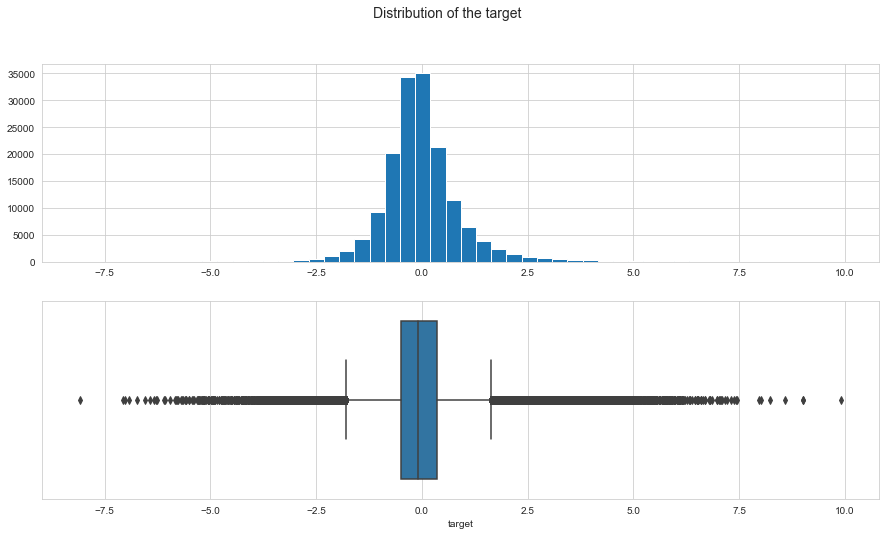

<IPython.core.display.Javascript object>

In [129]:
# Initiate plot
f, axes = plt.subplots(2, 1, figsize=(15, 8))

plt.suptitle("Distribution of the target", size=14)

# Target histogram
sample_df["target"].hist(bins=50, ax=axes[0])

# Target Boxplot
sns.boxplot(x="target", data=sample_df, ax=axes[1])
plt.show()

We don't have outliers above 10 and less than 8 as there are in the full dataset.

Let's see if the target is correlated to the features f_i.

In [106]:
correlation = sample_df[["target"] + features].corr()

<IPython.core.display.Javascript object>

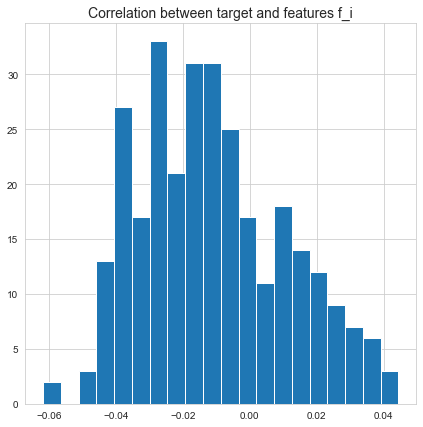

<IPython.core.display.Javascript object>

In [107]:
# Plot correlation values between target and features f_i
plt.figure(figsize=(7, 7))
correlation["target"].iloc[1:].hist(bins=20)
plt.title("Correlation between target and features f_i", size=14)
plt.show()

Correlation values are very low, so it means that target is not linked to features.

Let's see the correlation between the features f_i. As there are 300 features, it is difficult to see all correlations.

In [186]:
# création d'une fonction pour tracer la matrice des corrélations
# prend en paramètre le dataframe df


def mat_corr(df):

    # variables dont on veut étudier les corrélations
    corr = df.corr()

    # Génération d'un masque pour masquer le triangle supérieur et
    # n'afficher que la partie basse de la matrice
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Initialisation de la figure
    f, ax = plt.subplots(figsize=(30, 30))

    # Générationd d'un mapping pour les couleurs
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Graphe de la matrice des corrélations (= heatmap) avec le masque et affichage des valeurs de corrélation
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        # vmax=1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar=True,
        # annot=True,
    )
    plt.title("Correlation Matrix", size=20)
    plt.show()

<IPython.core.display.Javascript object>

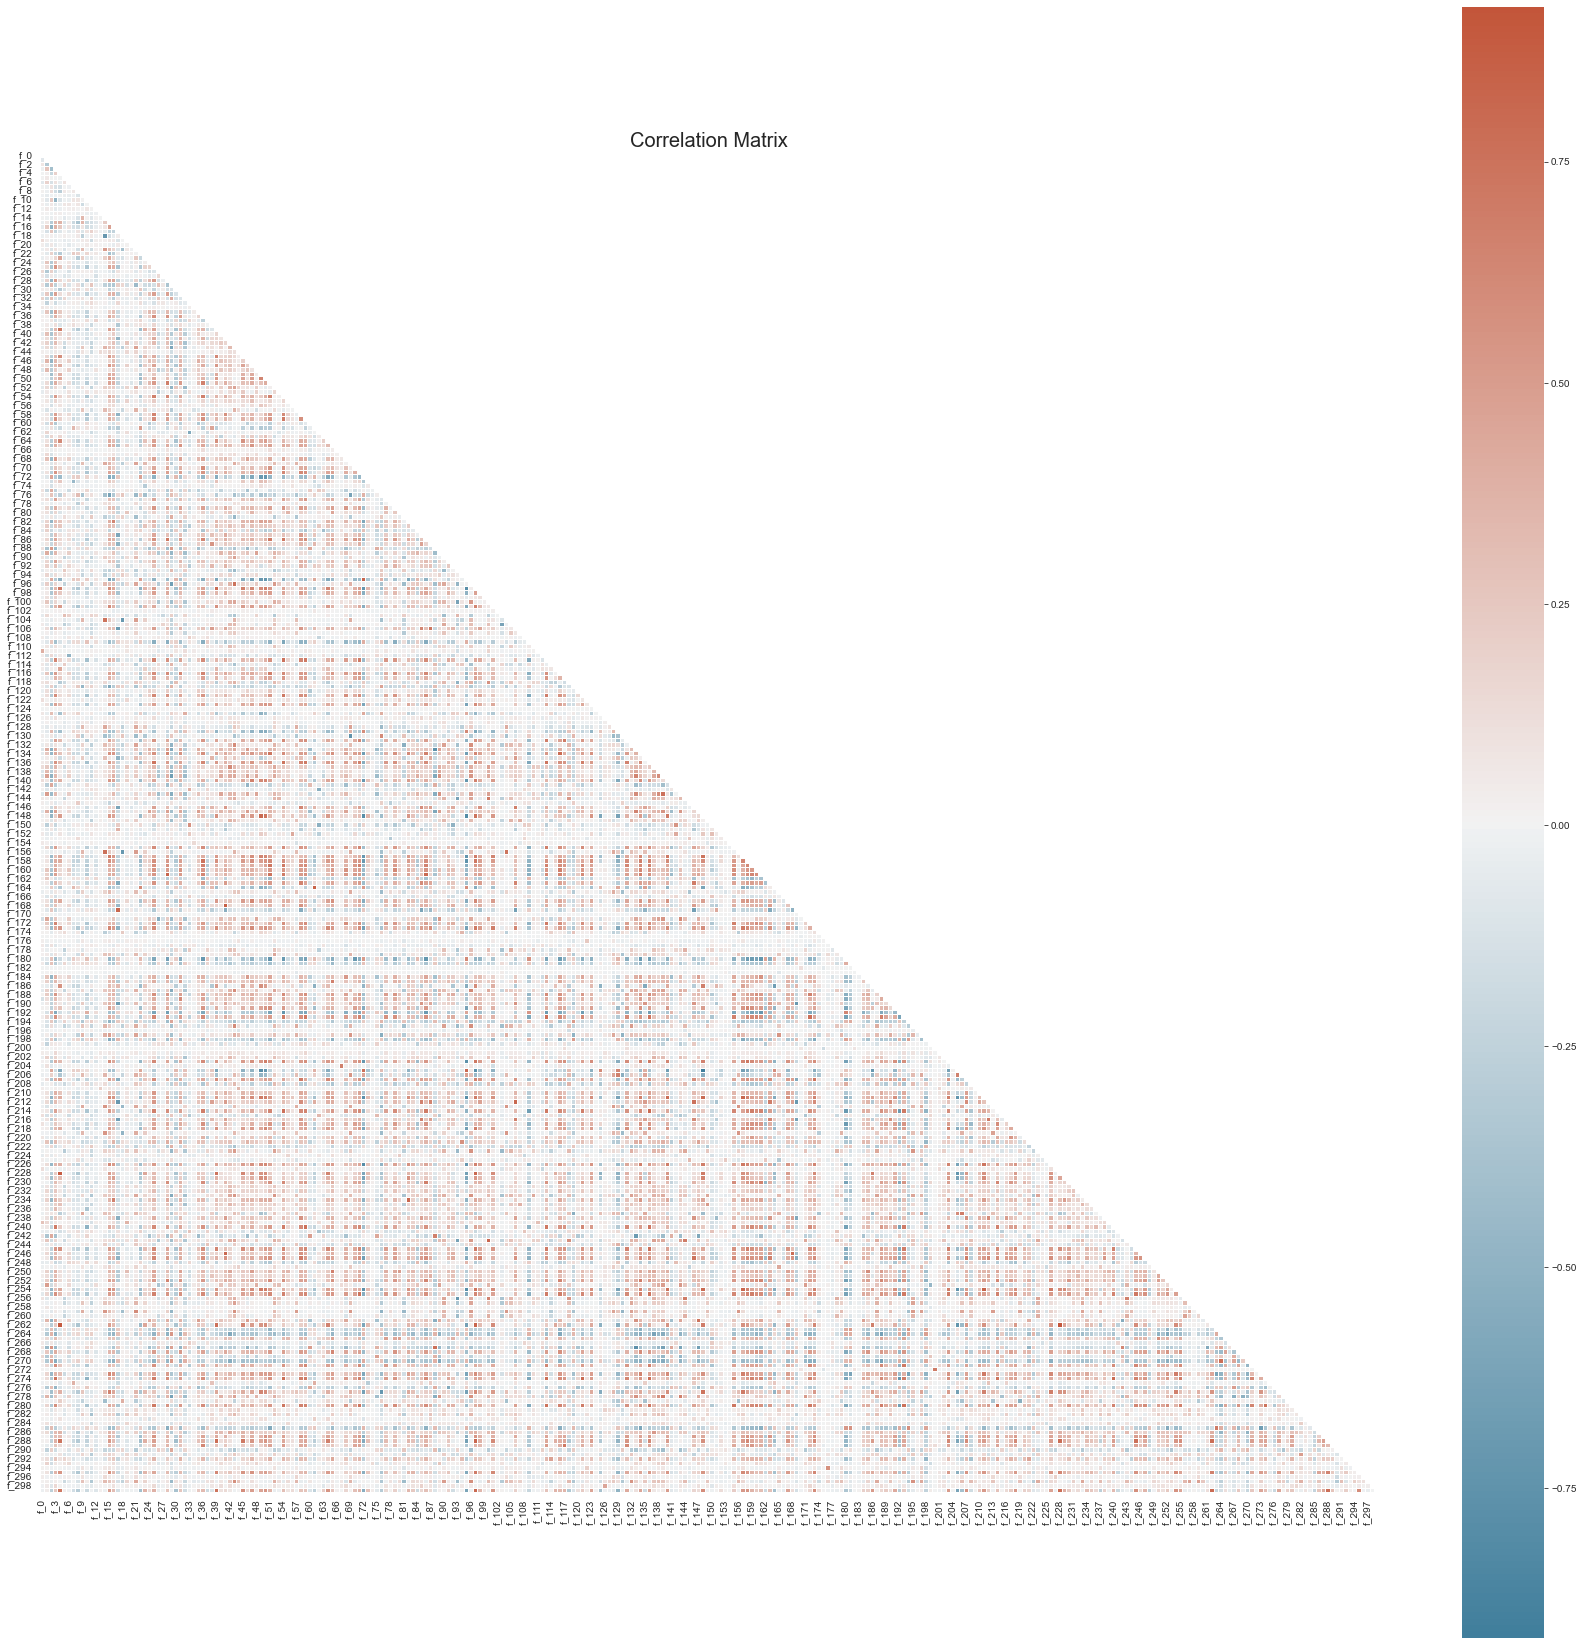

<IPython.core.display.Javascript object>

In [187]:
mat_corr(sample_df[features])

We are going to see the highest correlations. Genreally, it is considered that high correlation is above 0.8.

In [157]:
corr_matrix = sample_df[features].corr().abs()
high_corr_var = np.where(corr_matrix >= 0.80)
high_corr_var = [
    (corr_matrix.columns[x], corr_matrix.columns[y])
    for x, y in zip(*high_corr_var)
    if x != y and x < y
]
high_corr_var

[('f_4', 'f_228'),
 ('f_4', 'f_262'),
 ('f_17', 'f_169'),
 ('f_28', 'f_161'),
 ('f_41', 'f_168'),
 ('f_41', 'f_246'),
 ('f_49', 'f_148'),
 ('f_61', 'f_164'),
 ('f_72', 'f_95'),
 ('f_72', 'f_226'),
 ('f_82', 'f_234'),
 ('f_86', 'f_161'),
 ('f_95', 'f_148'),
 ('f_95', 'f_205'),
 ('f_97', 'f_228'),
 ('f_97', 'f_262'),
 ('f_97', 'f_288'),
 ('f_97', 'f_299'),
 ('f_100', 'f_243'),
 ('f_106', 'f_212'),
 ('f_121', 'f_274'),
 ('f_148', 'f_205'),
 ('f_157', 'f_211'),
 ('f_157', 'f_254'),
 ('f_211', 'f_254'),
 ('f_228', 'f_262'),
 ('f_240', 'f_274')]

<IPython.core.display.Javascript object>

We can see that several features are correlated to more than one feature, such as f_4, f_228, f_41, f_95, f_97...

In [165]:
# Select the lower triangle of the correlation matrix
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))
# k = -1 to remove values on diagonal

<IPython.core.display.Javascript object>

In [166]:
lower

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
f_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f_1,0.082815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f_2,0.074718,0.307867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f_3,0.015849,0.264071,0.402187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f_4,0.003462,0.021347,0.201181,0.194410,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f_295,0.013182,0.095795,0.298812,0.370096,0.557279,0.010042,0.000798,0.176859,0.331292,0.080980,...,0.104876,0.121703,0.230397,0.042703,0.028646,NaN,NaN,NaN,NaN,NaN
f_296,0.032122,0.008470,0.007839,0.008434,0.009452,0.024701,0.020637,0.003275,0.025657,0.089795,...,0.184267,0.021715,0.006330,0.001144,0.018327,0.023950,NaN,NaN,NaN,NaN
f_297,0.011692,0.027851,0.035620,0.035568,0.001188,0.194568,0.060175,0.000339,0.121456,0.277553,...,0.315849,0.300274,0.109331,0.003018,0.206185,0.098861,0.106760,NaN,NaN,NaN
f_298,0.004909,0.051047,0.090476,0.151757,0.014288,0.008074,0.007807,0.011050,0.028148,0.001722,...,0.052462,0.026947,0.059276,0.010548,0.001416,0.047891,0.012549,0.030176,NaN,NaN


<IPython.core.display.Javascript object>

In [171]:
# Find features with correlation greater than 0.80
to_drop = [column for column in lower.columns if any(lower[column] >= 0.8)]
print("We find {} features with high correlation (>=0.8)".format(len(to_drop)))

We find 19 features with high correlation (>=0.8)


<IPython.core.display.Javascript object>

In [172]:
# Drop these features
sample_df_1 = sample_df.drop(to_drop, axis=1)

<IPython.core.display.Javascript object>

In [173]:
sample_df_1.shape

(157070, 285)

<IPython.core.display.Javascript object>

In [182]:
features_1 = list(sample_df_1.columns)

<IPython.core.display.Javascript object>

In [183]:
others = ["row_id", "time_id", "investment_id", "target"]

for x in others:
    features_1.remove(x)

<IPython.core.display.Javascript object>

In [184]:
len(features_1)

281

<IPython.core.display.Javascript object>

Correlated features have been removed.

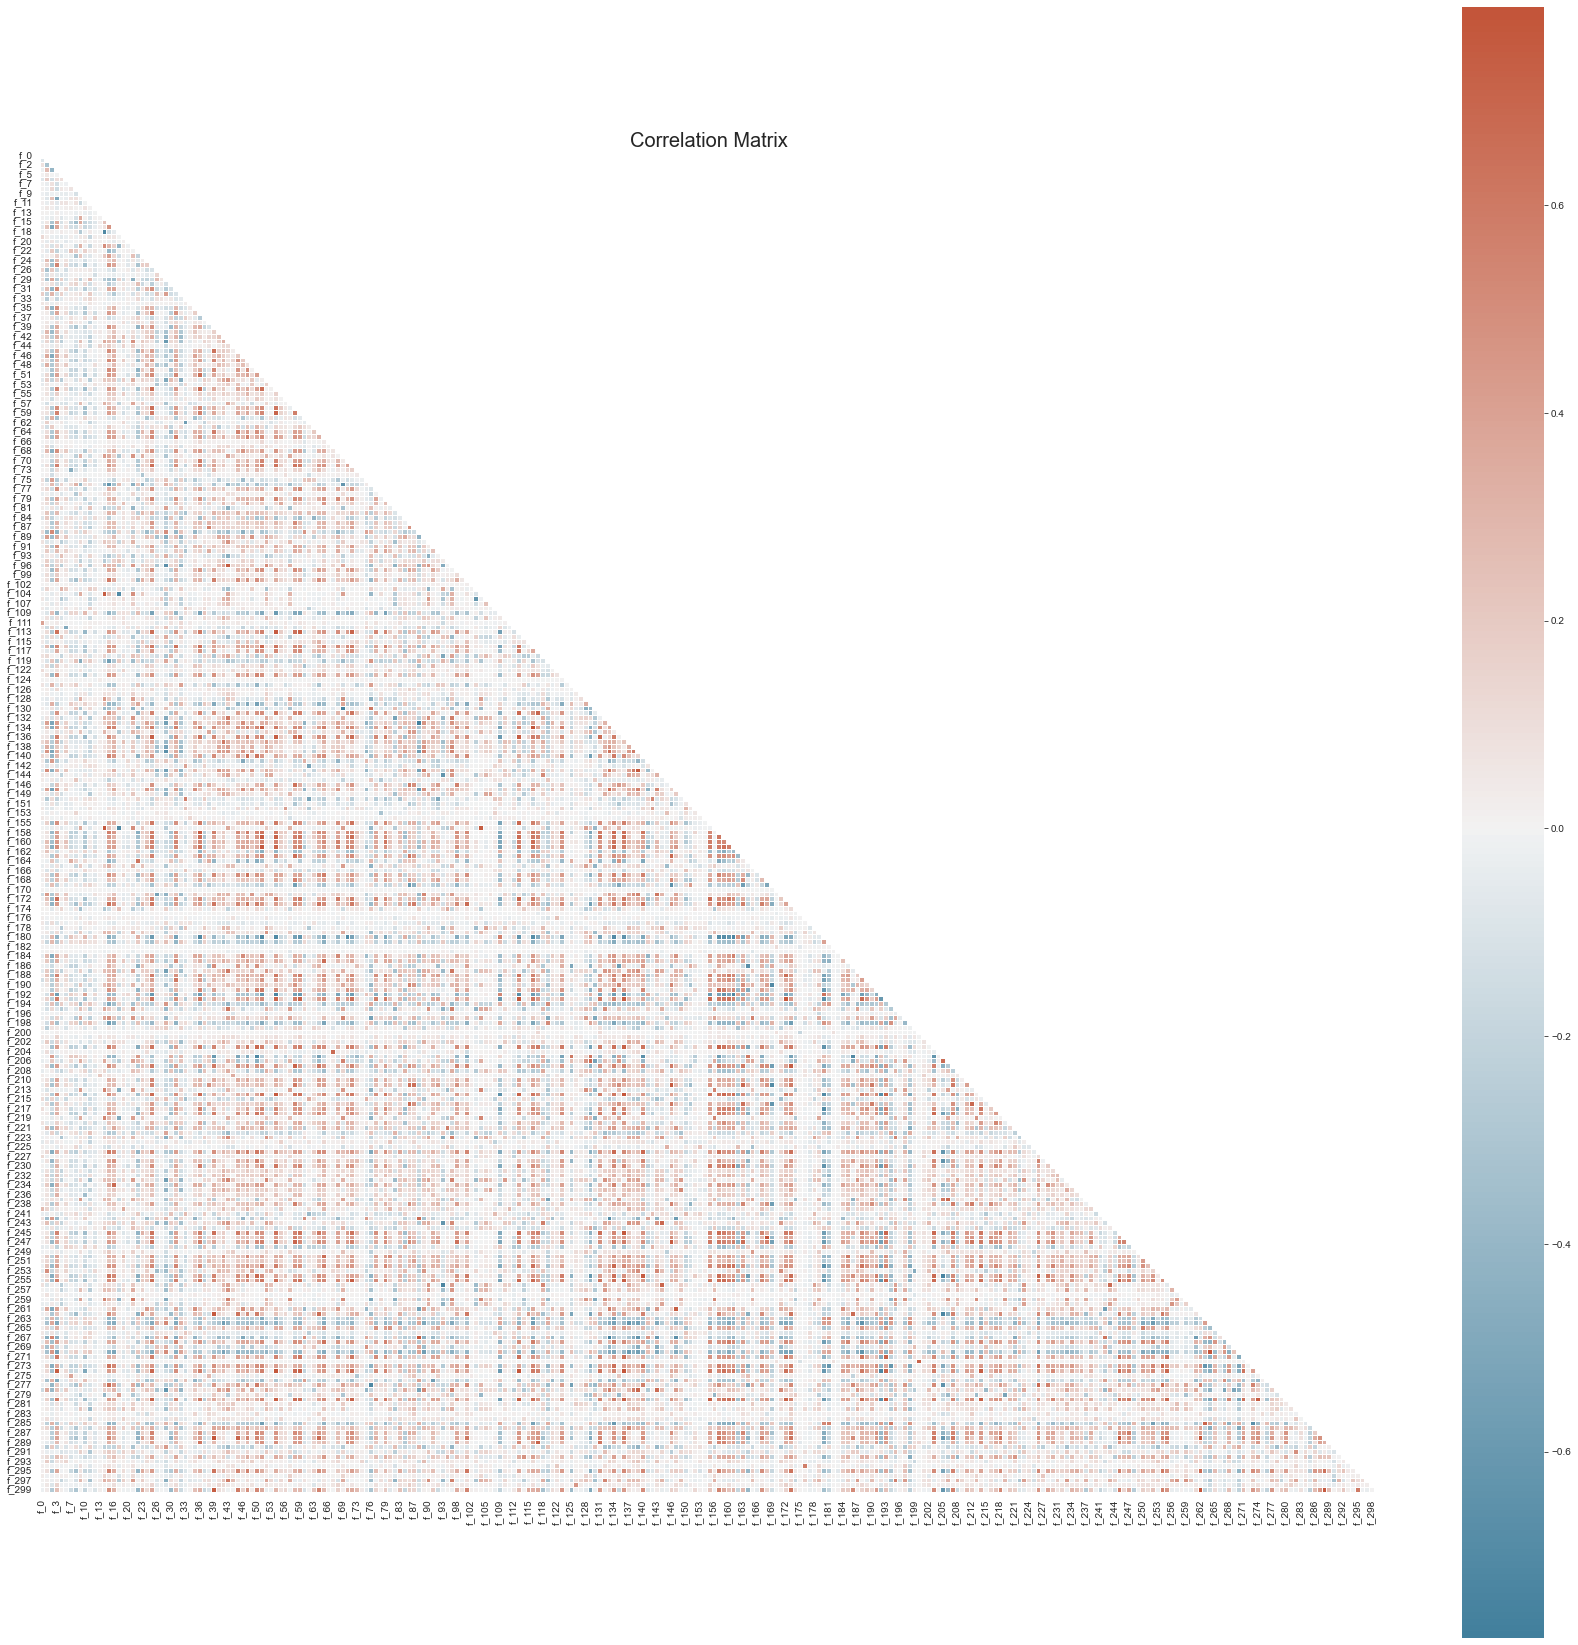

<IPython.core.display.Javascript object>

In [190]:
mat_corr(sample_df[features_1])

## PCA
We are going to consider PCA in order to decrease the number of features.

In [191]:
# Define X and y
X = sample_df_1.drop(others, axis=1).values
y = sample_df_1["target"].values

<IPython.core.display.Javascript object>

In [192]:
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (157070, 281)
y shape :  (157070,)


<IPython.core.display.Javascript object>

We are going to compare normalized data and unnormalized data. As mentioned above, we are going to use Standard Scaler for normalization.

In [195]:
robust_scal = RobustScaler().fit(X)
X_scaled = robust_scal.transform(X)
X_scaled.shape

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:1418: RuntimeWarning: overflow encountered in true_divide
  X /= self.scale_


(157070, 281)

<IPython.core.display.Javascript object>

In [196]:
# PCA
pca = PCA(random_state=0)
pca.fit(X)

PCA(random_state=0)

<IPython.core.display.Javascript object>

In [ ]:
def display_scree_plot(pca):

    """ Fonction pour représenter visualiser l'éboulis des valeurs propres de la pca
        
    - Arguments :
        - pca : modèle pcq entrainé
    
    - Affiche :
        - un barplot pour chaque composante de la pcs
        - la somme cumulée de l'inertie en pourcentage 
        (= variance expliquée par la pca)
    """

    plt.figure(figsize=(12, 8))
    scree = pca.explained_variance_ratio_ * 100

    # Barplot pour chaque composante
    plt.bar(np.arange(len(scree)) + 1, scree)

    # Somme cumulée
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker="o")

    plt.xlabel("rang de l'axe d'inertie", size=13)
    plt.ylabel("pourcentage d'inertie", size=13)
    plt.title("Eboulis des valeurs propres", size=14)
    plt.show(block=False)